# Project Name: Rain Prediction using ML models and PyCaret

### In this project we will create a web app which will predict wether it will rain tomorrow or not.


### We will be using different ML models and then Auto ML Library i.e. PyCaret in this project

### Time Line of the Project :
- Data Analysis
- Handling Missing Values
- Handling Categorical Varibales
- Feature Engineering
- Model Building using ML 
- Model Building using Auto ML i.e PyCaret

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading our data

In [3]:
df=  pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")
pd.set_option("display.max_columns", None)

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Let us devide our variables into different categories

In [5]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

#### Discrete Variable are countable in finit amount of time while numerical variable are to much in number to count

In [6]:
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(df[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in df.columns if feature not in num_var]

In [7]:
df[categ_var]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


### Handling Missing Values

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [10]:
def find_var_type(var):
    

    if var in discrete_var:
        print("{} is a Numerical Variable, Discrete in nature".format(var))
    elif var in cont_var :
        print("{} is a Numerical Variable, Continuous in nature".format(var))
    else :
        print("{} is a Categorical Variable".format(var))

In [11]:
find_var_type('Cloud3pm')

Cloud3pm is a Numerical Variable, Discrete in nature


### We will do Ramdom Sample Imputation for the our variables which are having the most percentage of Nul Vlaues

In [12]:
def RandomSampleImputation(df, feature):
    df[feature]=df[feature]
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [13]:
RandomSampleImputation(df, "Cloud9am")
RandomSampleImputation(df, "Cloud3pm")
RandomSampleImputation(df, "Evaporation")
RandomSampleImputation(df, "Sunshine")

In [14]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [15]:
find_var_type('RainToday')

RainToday is a Categorical Variable


### Then we will replace the null values of all the continuous feature which are having less number of null values

In [16]:
def MeanImputation(df, feature):
    df[feature]= df[feature]
    mean= df[feature].mean()
    df[feature]= df[feature].fillna(mean)

In [17]:
MeanImputation(df,'Pressure3pm')

In [18]:
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'MinTemp')
MeanImputation(df, 'MaxTemp')
MeanImputation(df, 'Rainfall')
MeanImputation(df, 'WindGustSpeed')
MeanImputation(df, 'WindSpeed9am')
MeanImputation(df, 'WindSpeed3pm')
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'Humidity9am')
MeanImputation(df, 'Humidity3pm')
MeanImputation(df, 'Temp3pm')
MeanImputation(df, 'Temp9am')

In [19]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

### Now we are left with the categotical varibales only, for these variables we will replace null values later in the Label Encoding part.

### Plotting a HeatMap

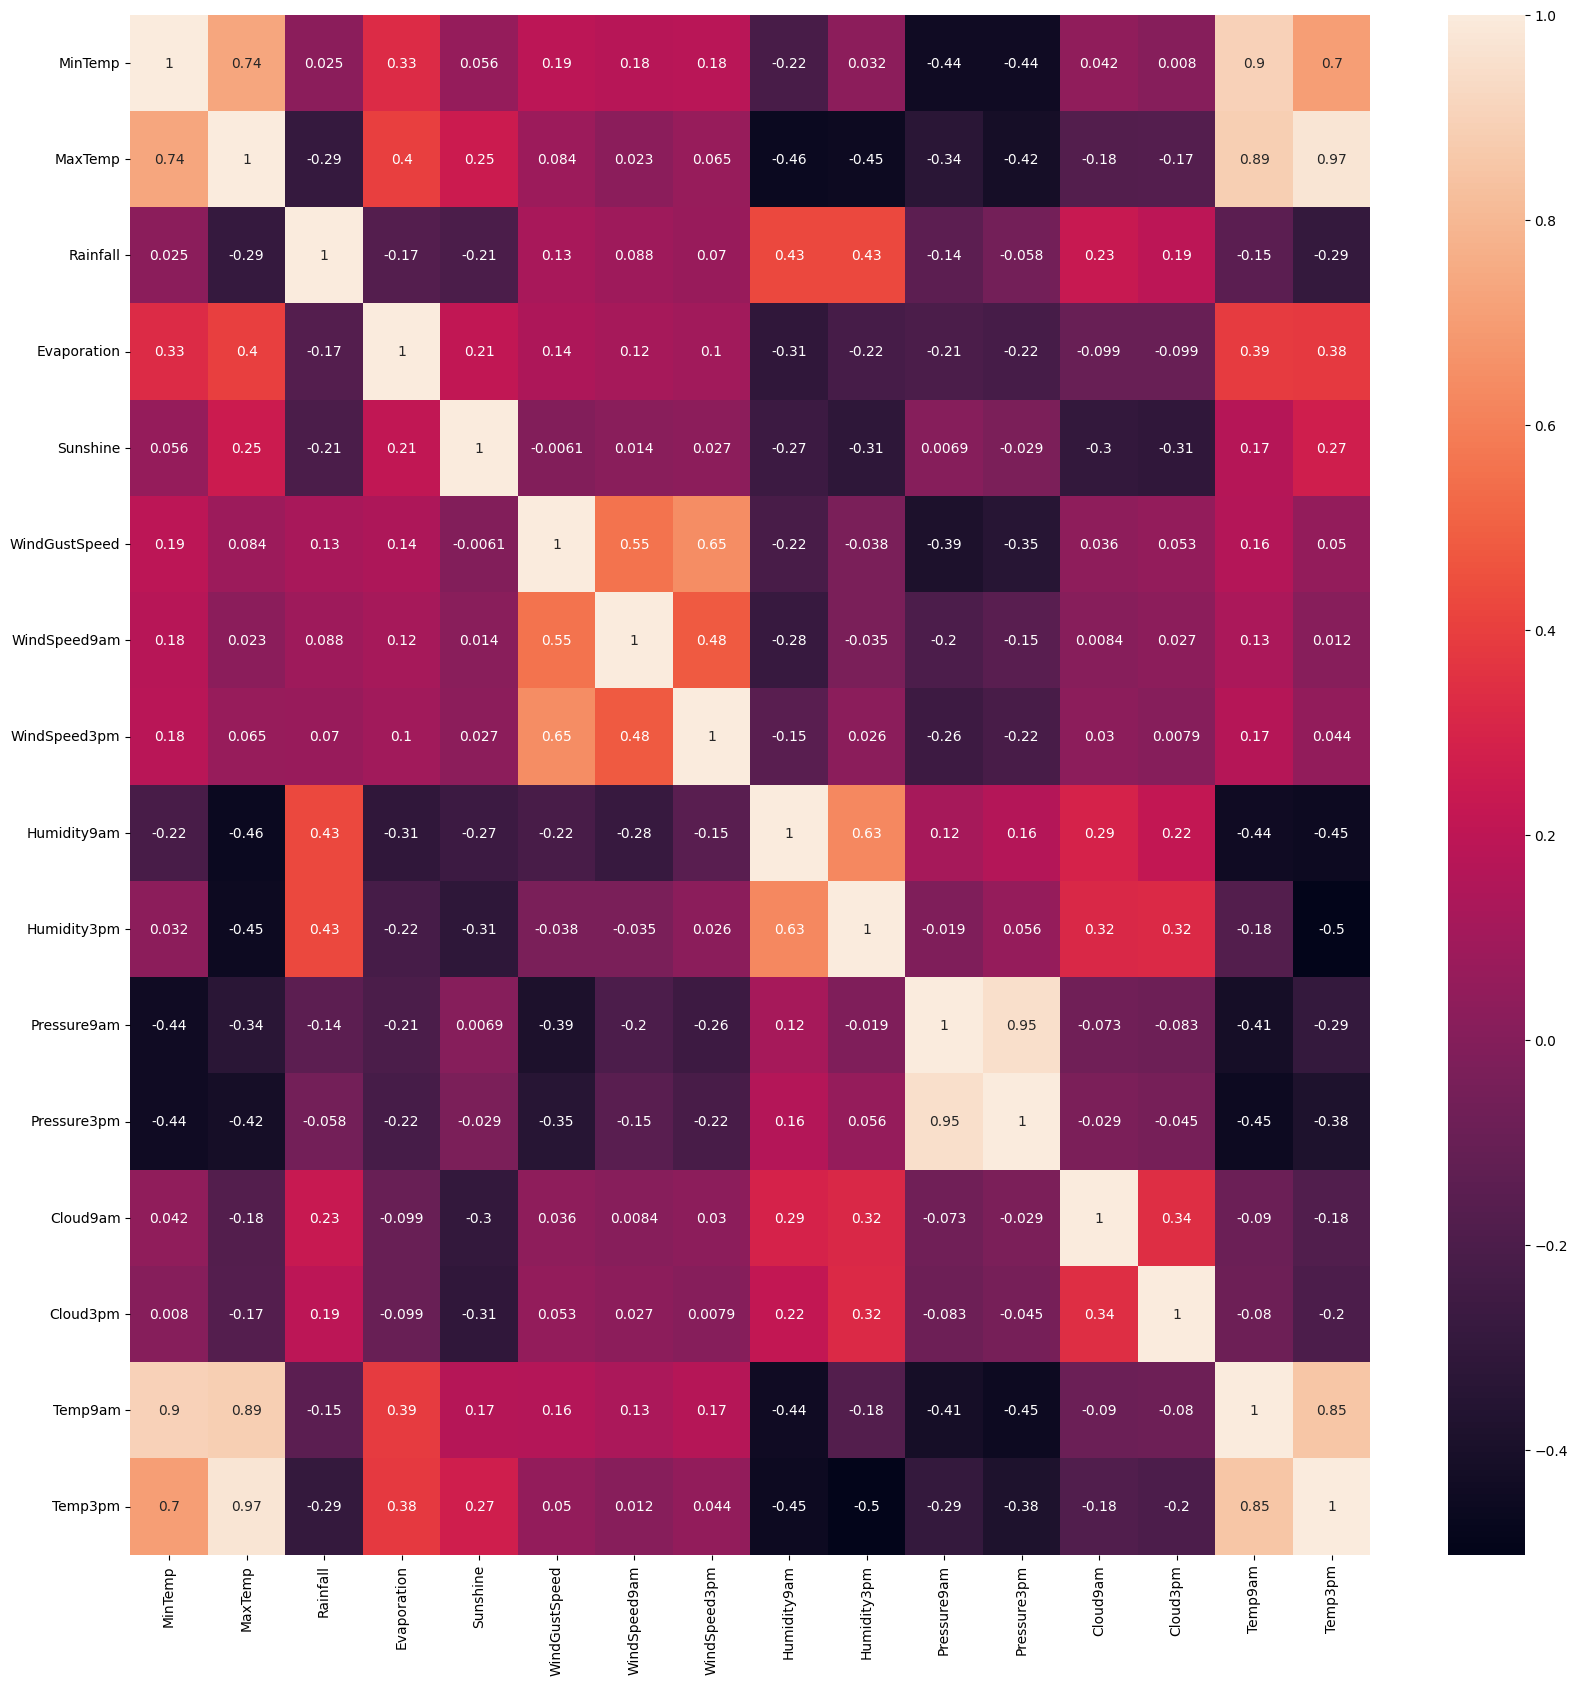

In [20]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

### Analysis for Continuous variables

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


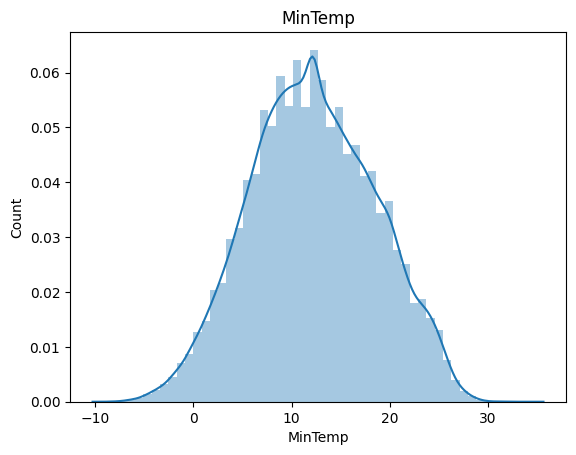

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


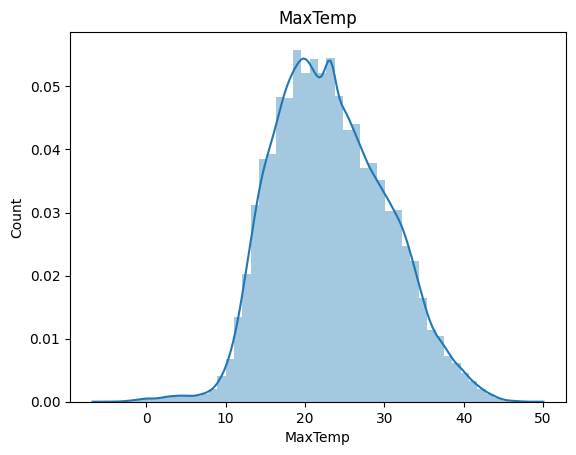

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


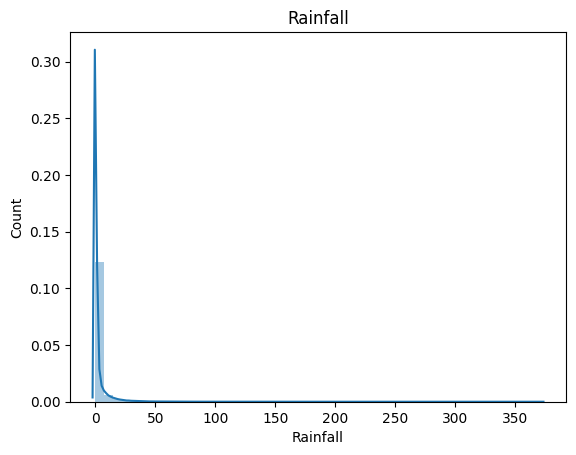

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


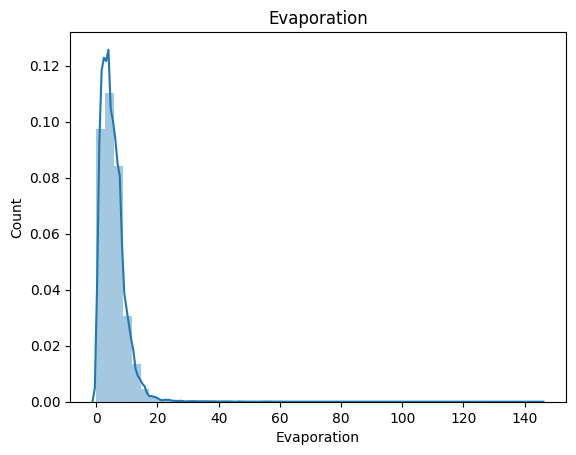

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


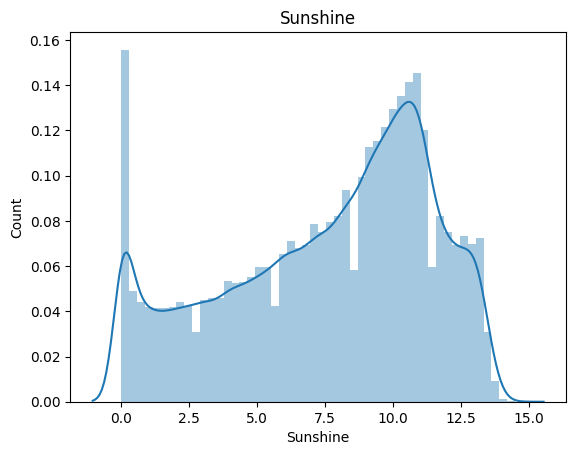

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


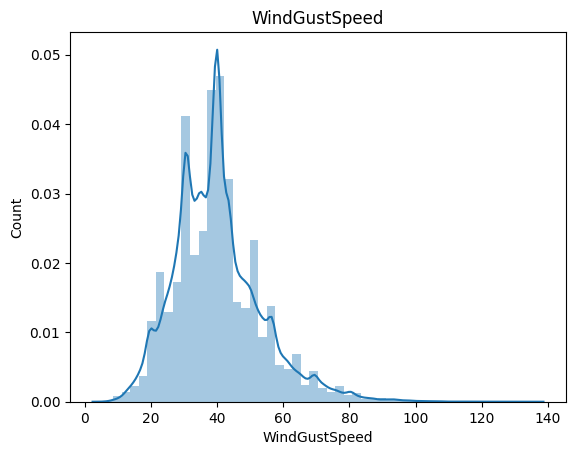

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


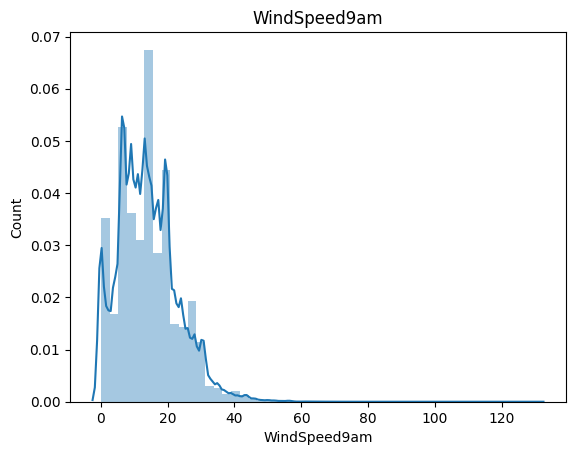

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


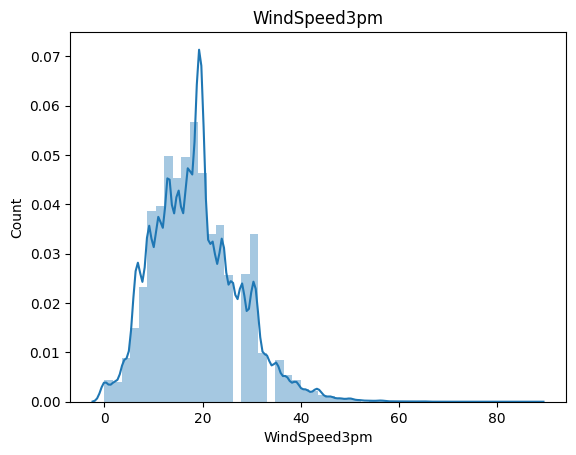

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


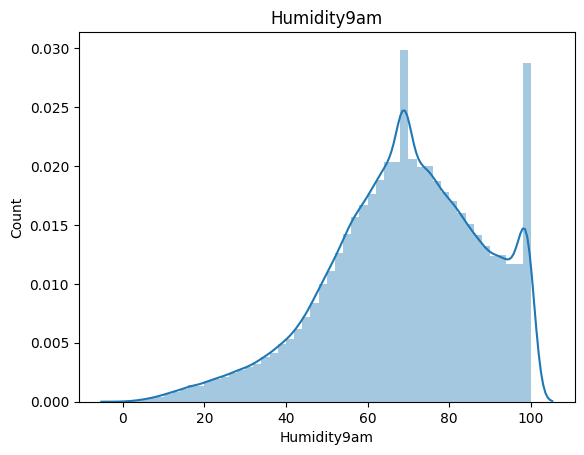

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


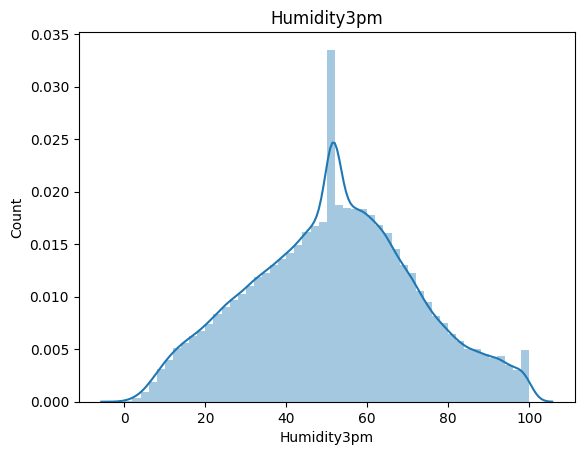

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


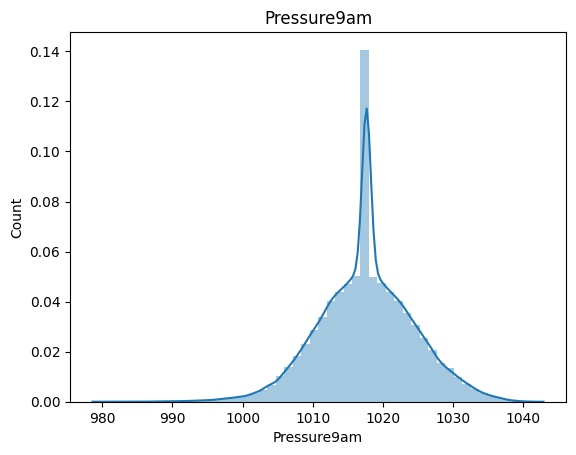

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


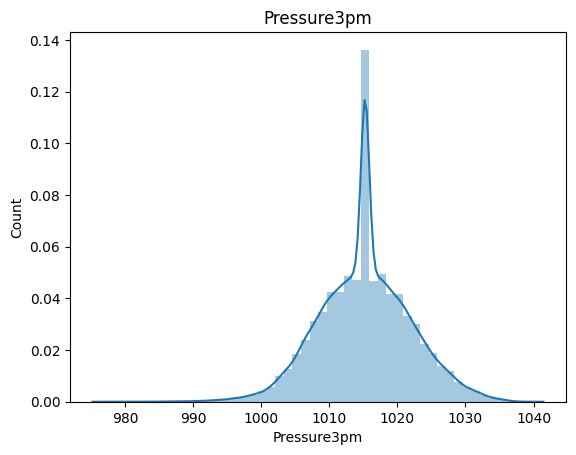

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


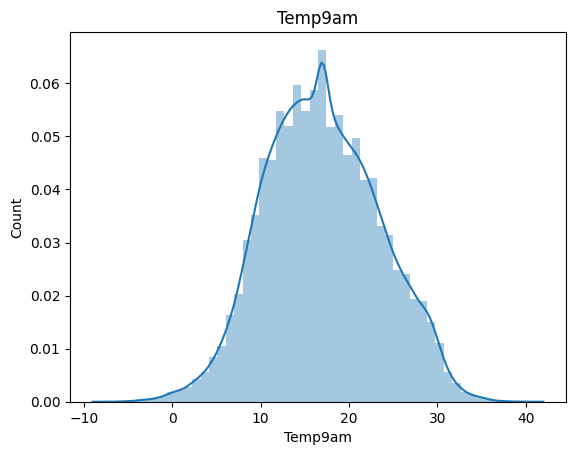

<Figure size 1500x1500 with 0 Axes>

<ipython-input-21-9dfe93c08e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


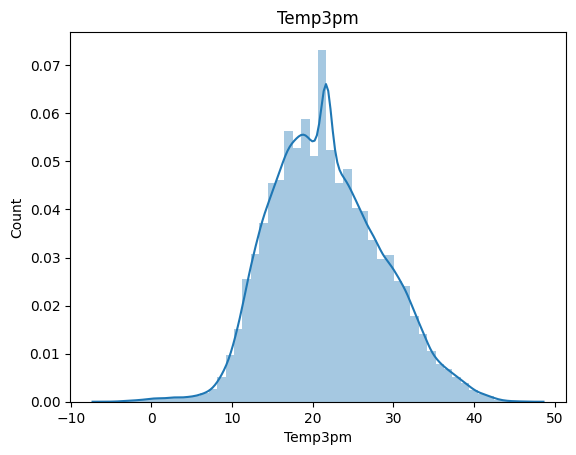

<Figure size 1500x1500 with 0 Axes>

In [21]:
for feature in cont_var:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

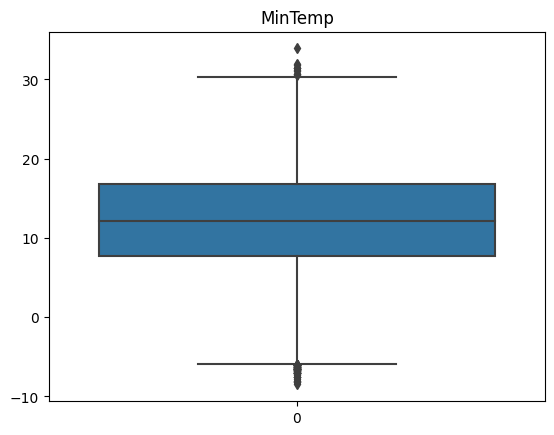

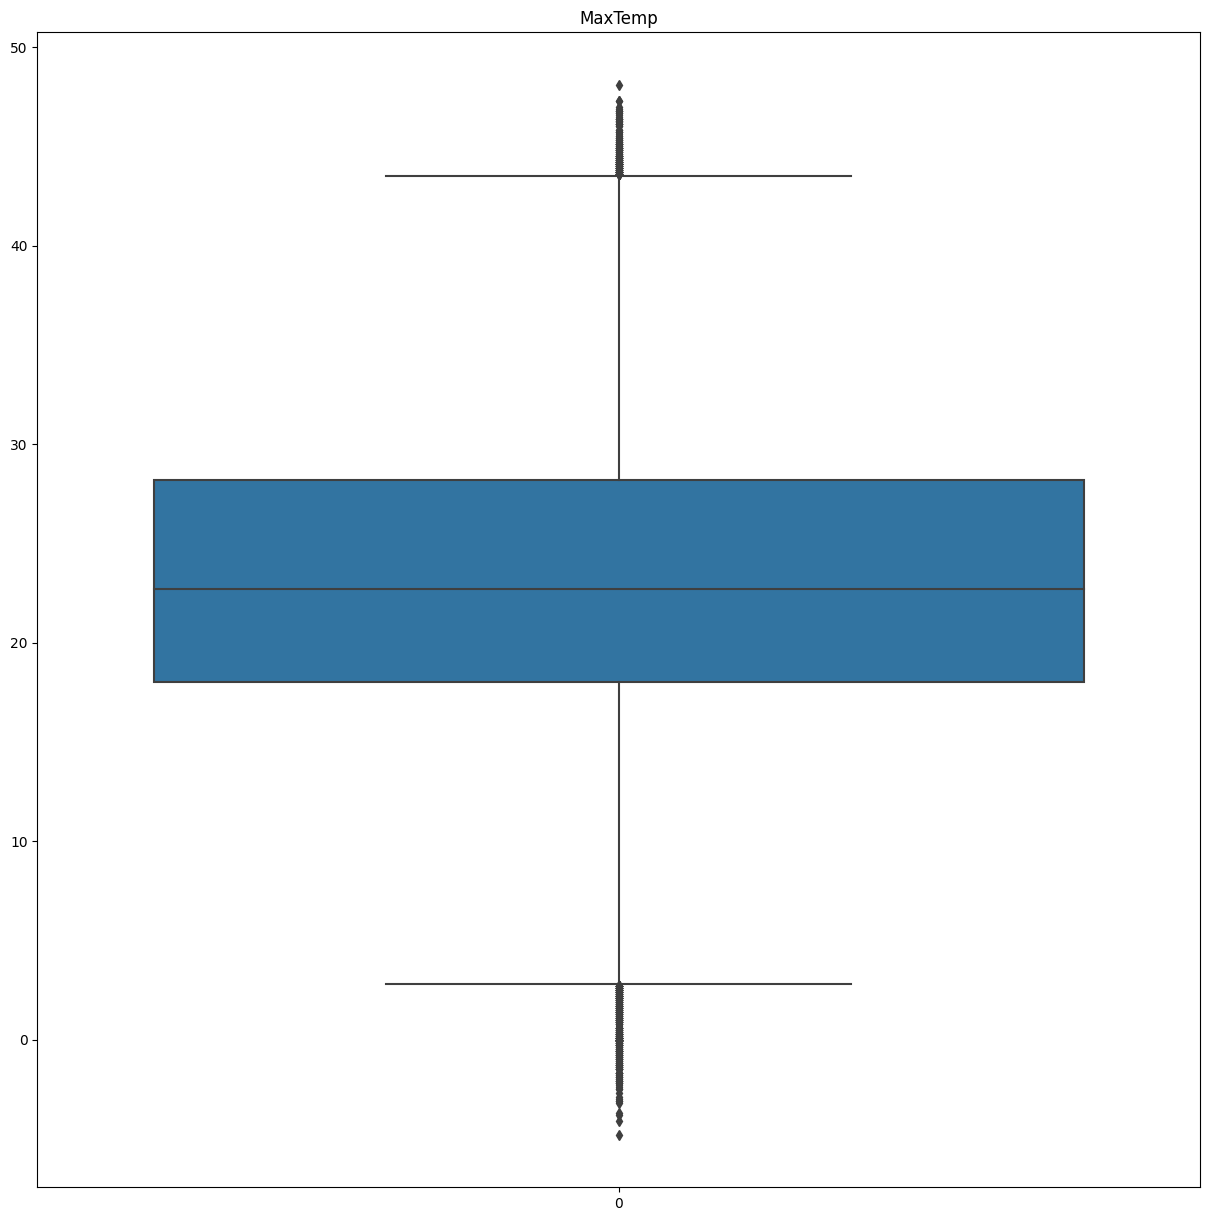

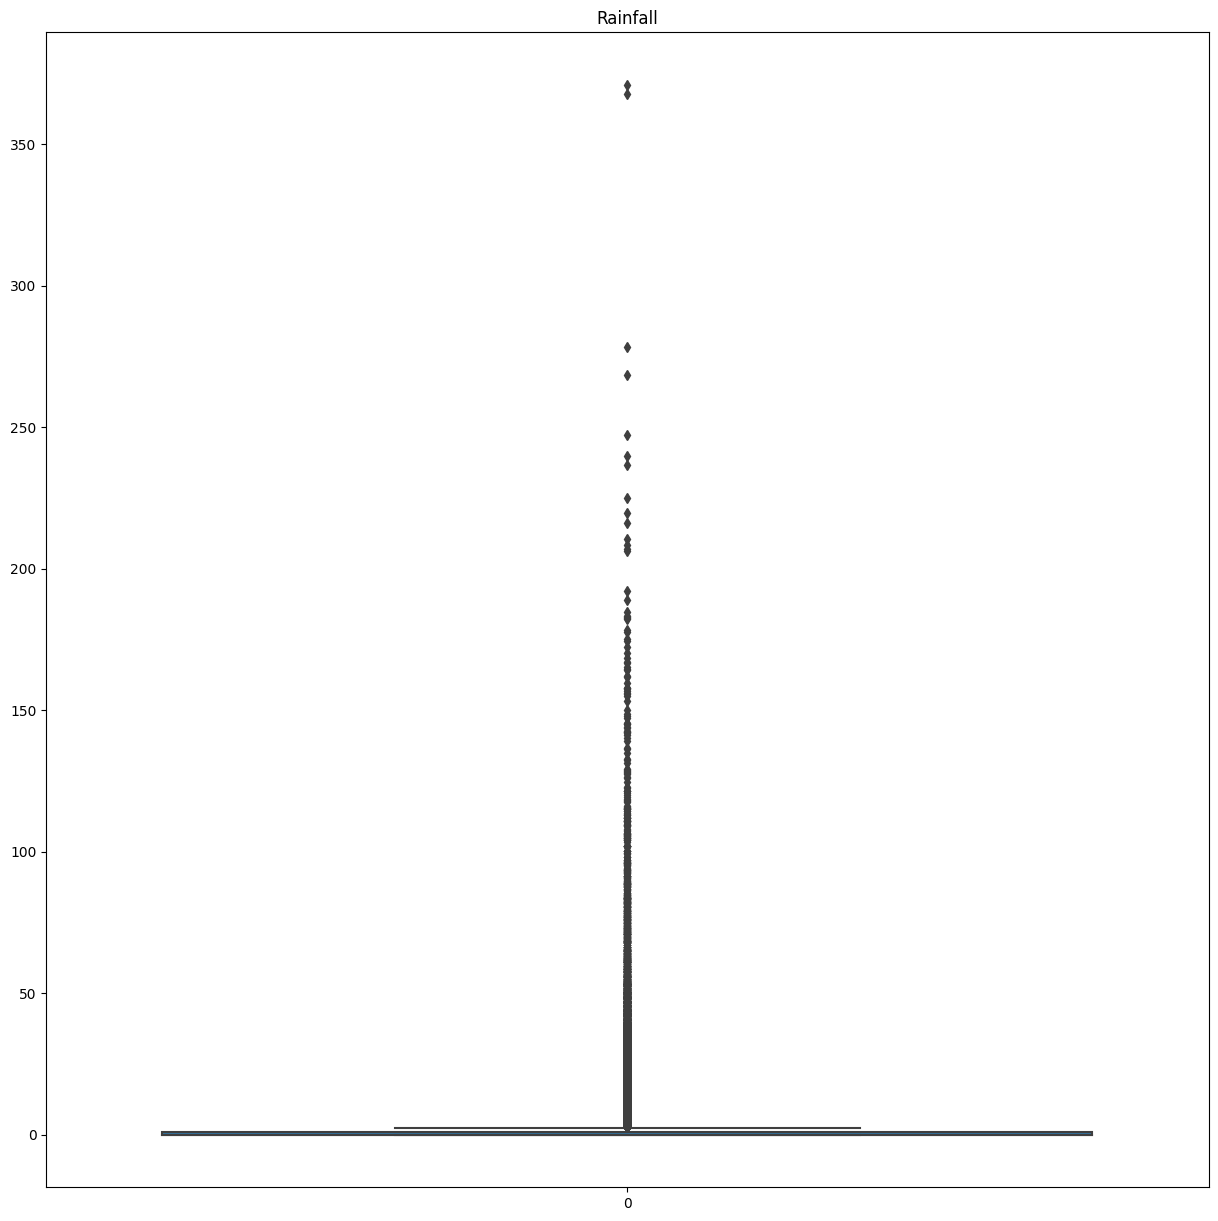

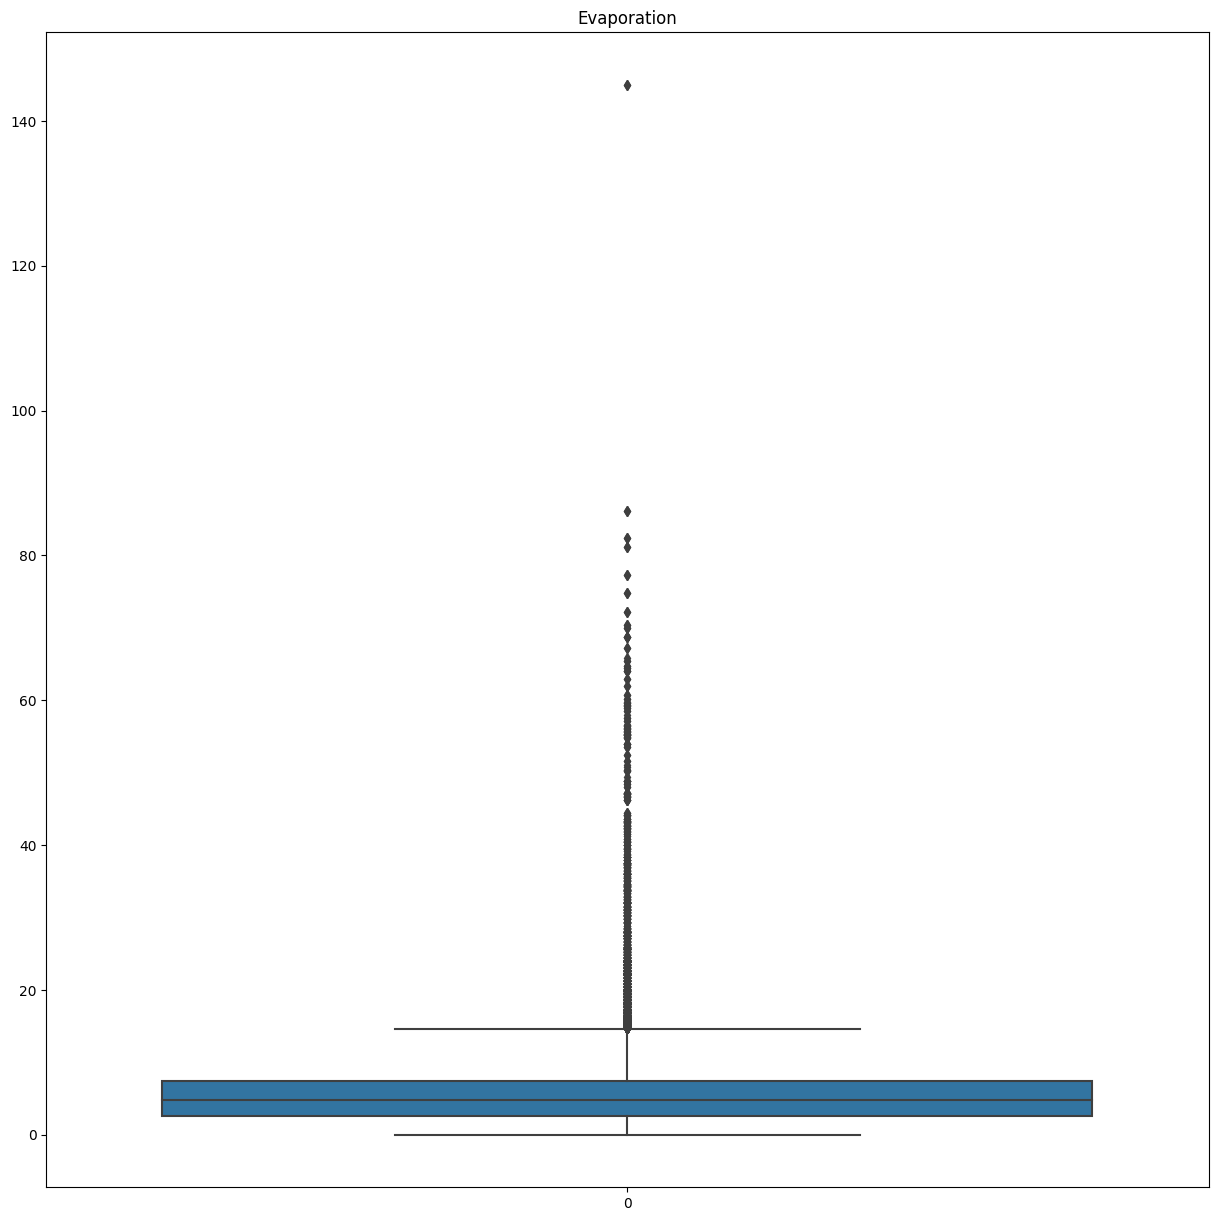

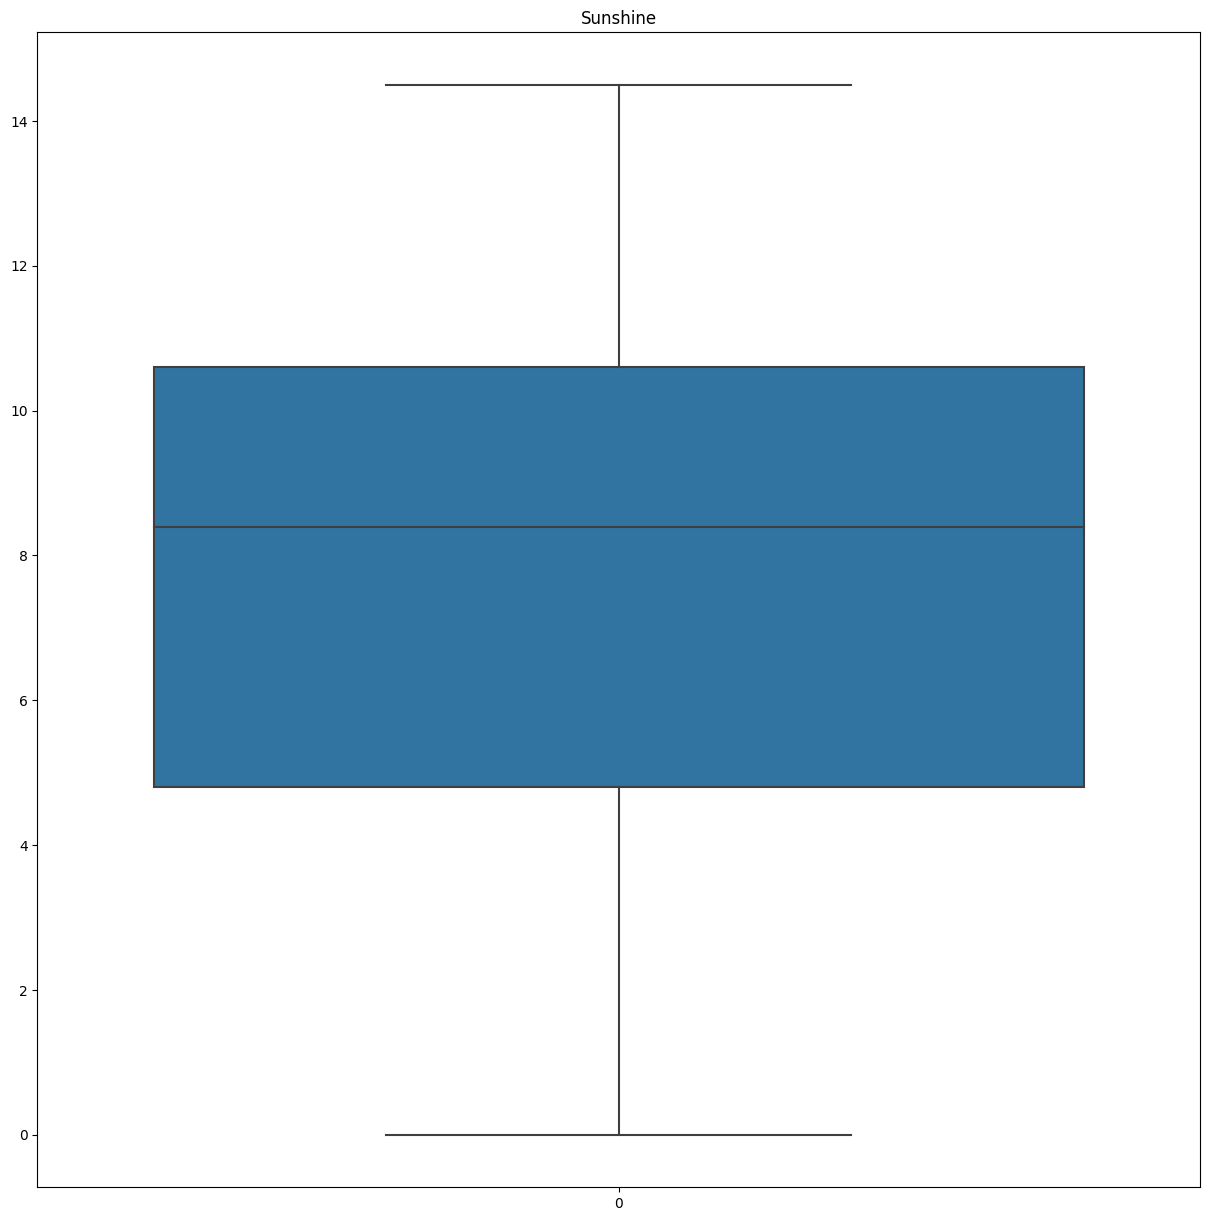

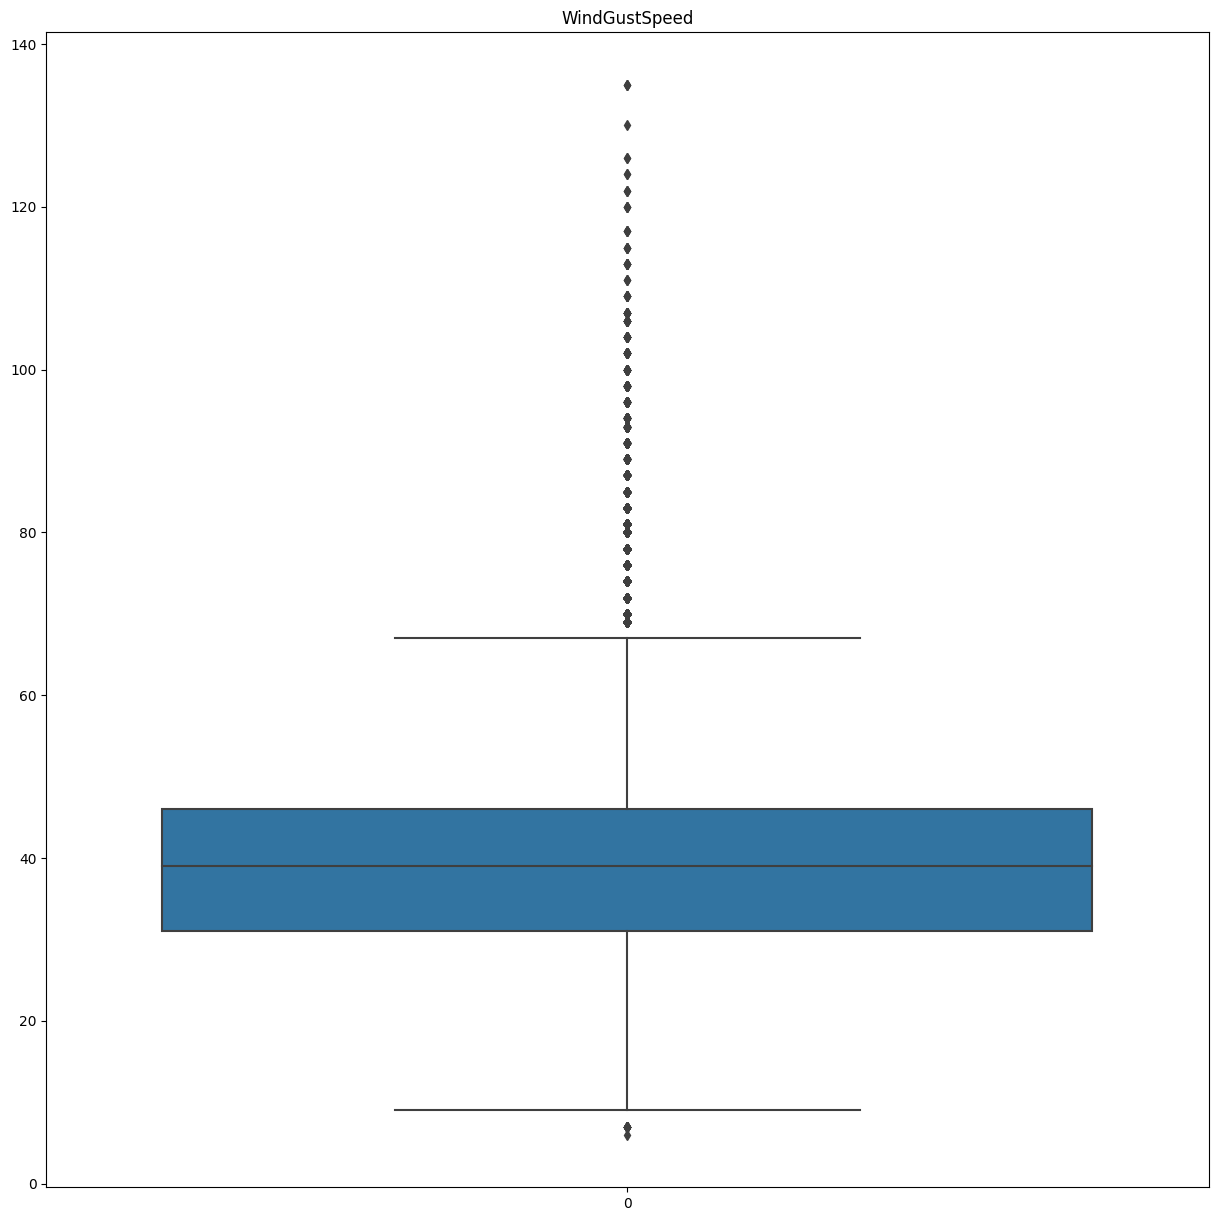

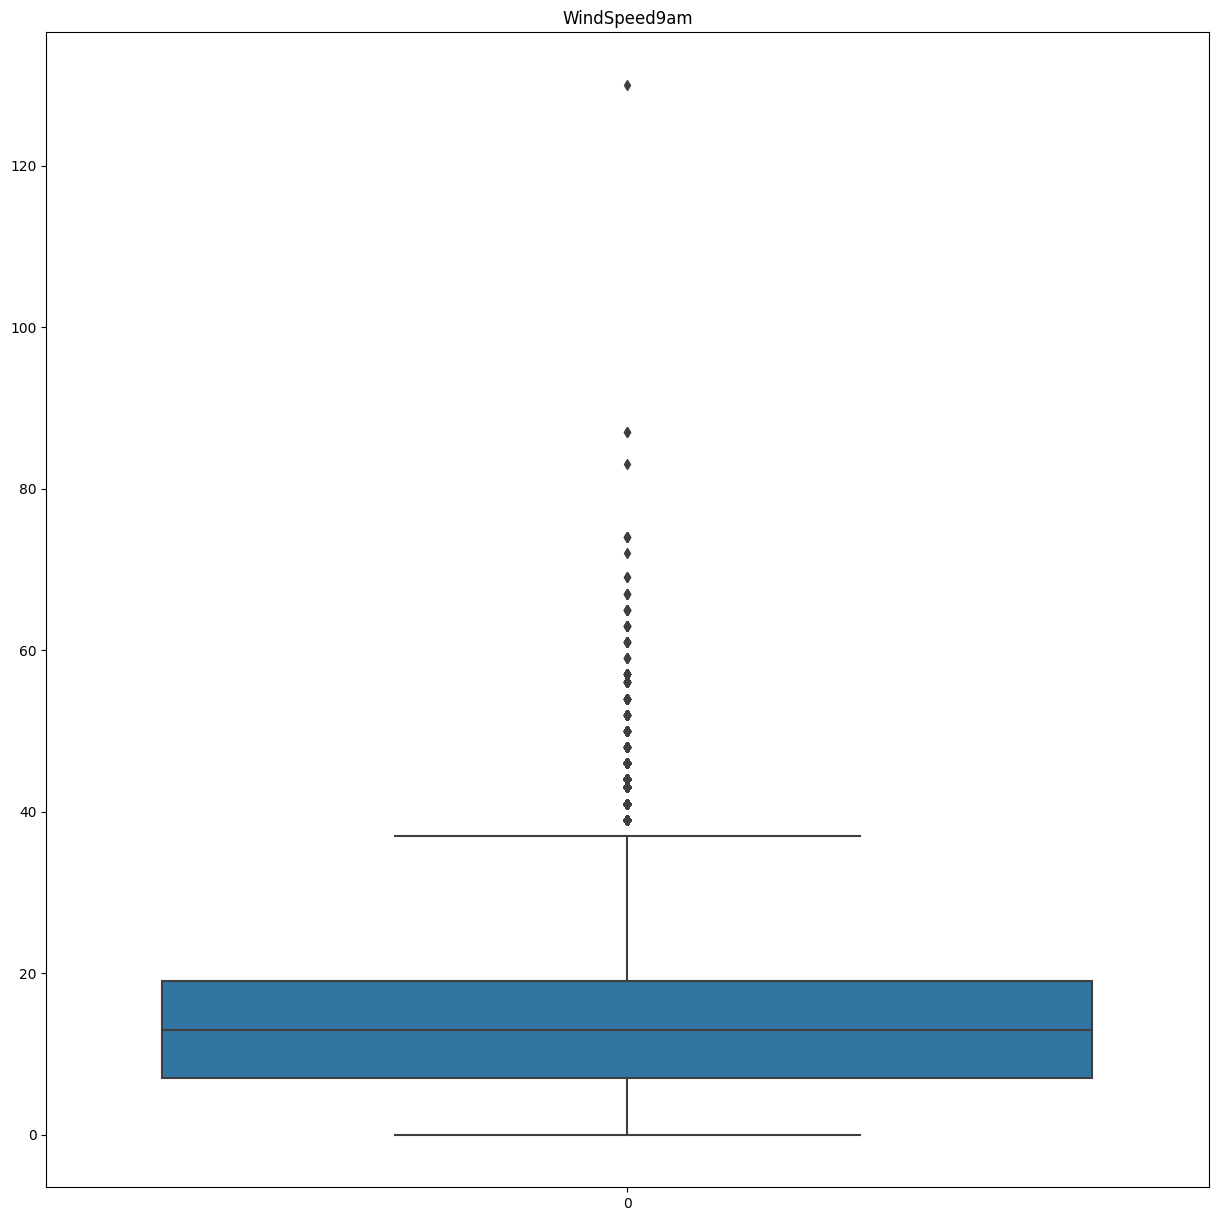

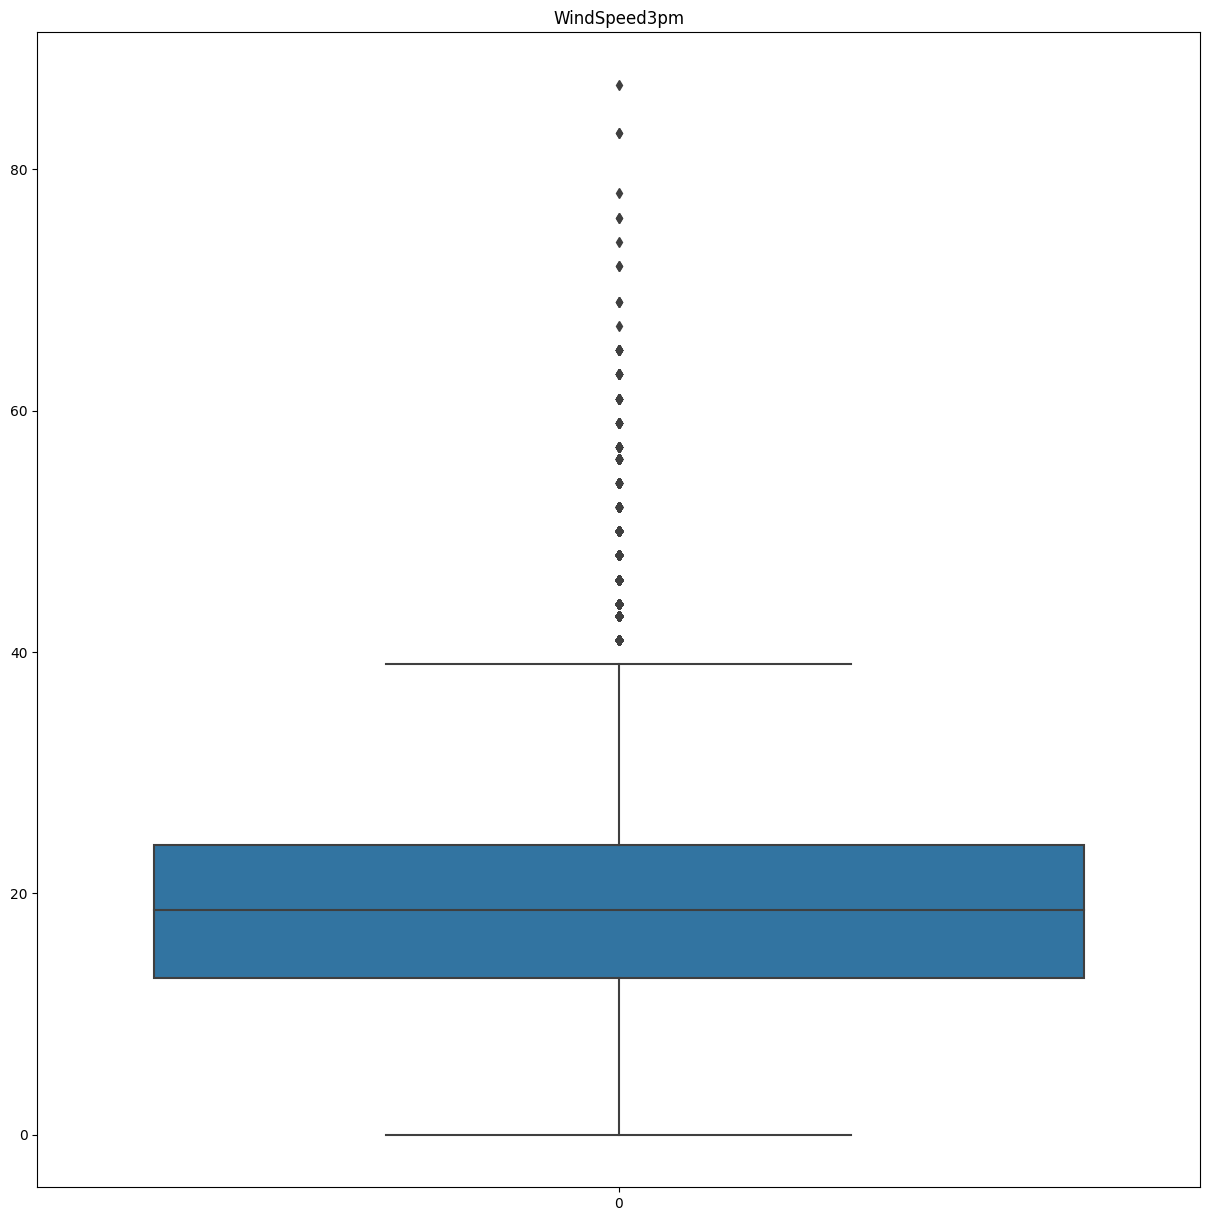

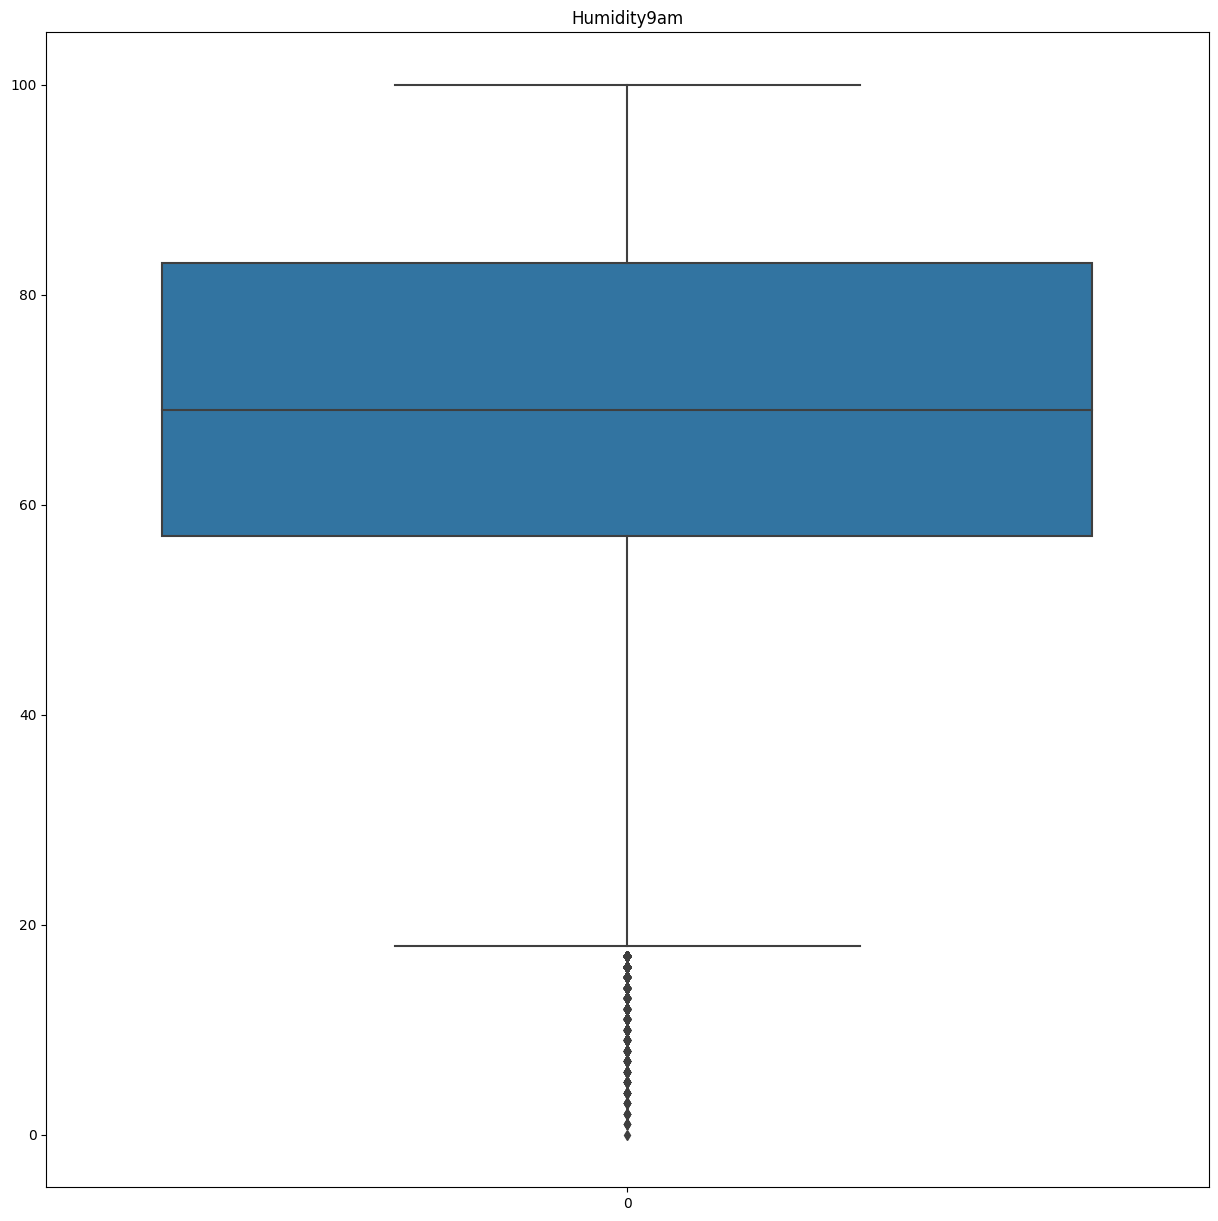

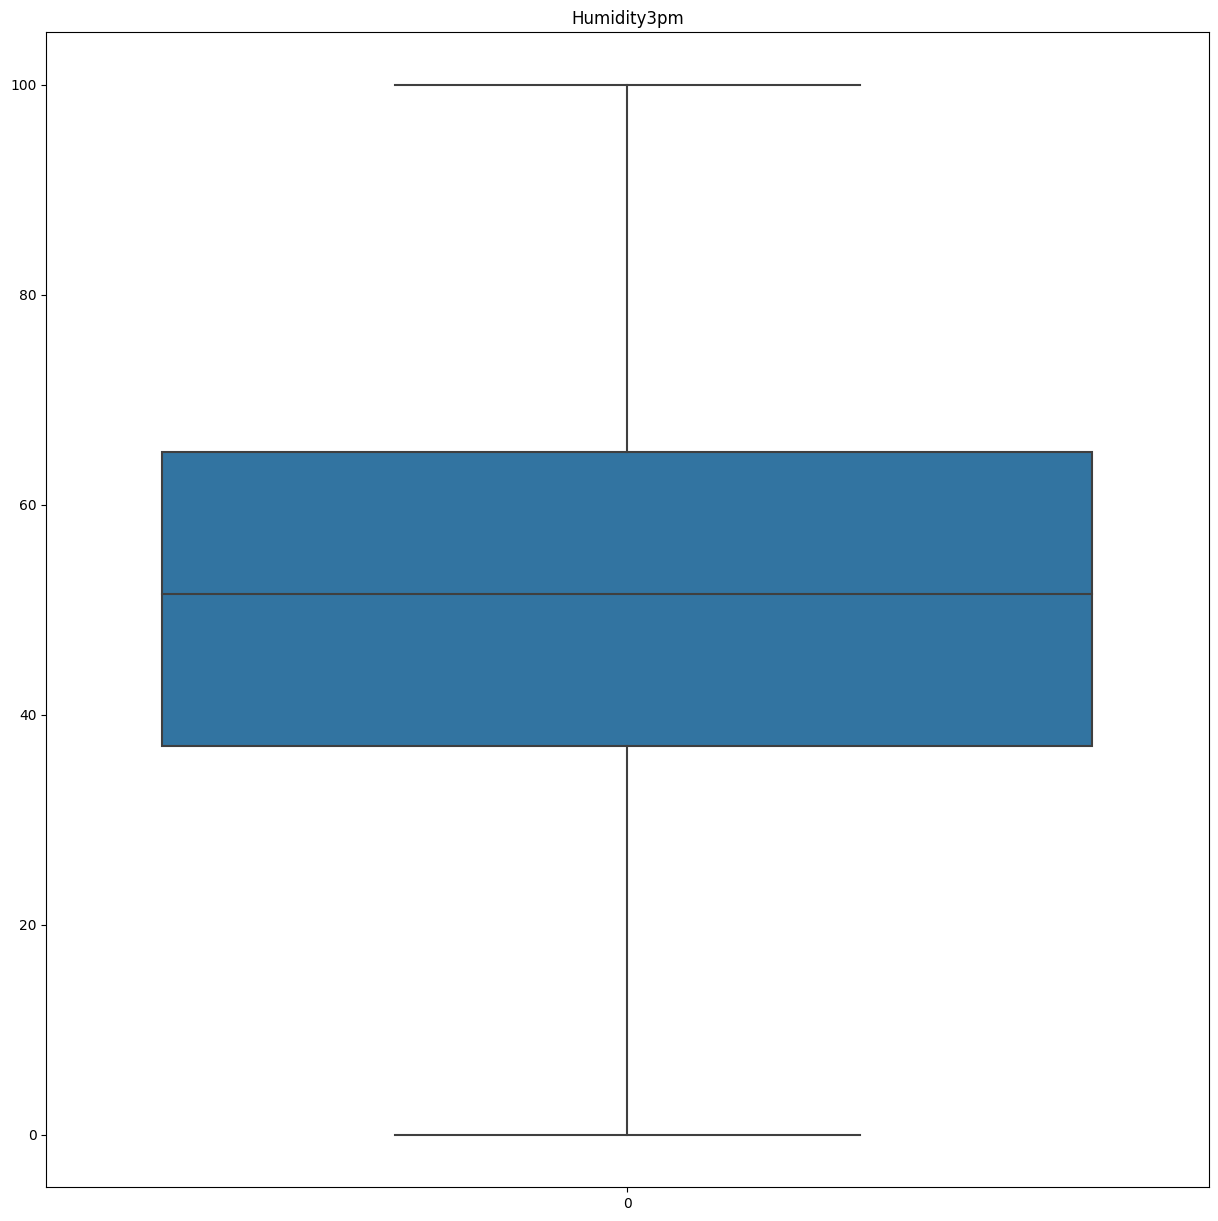

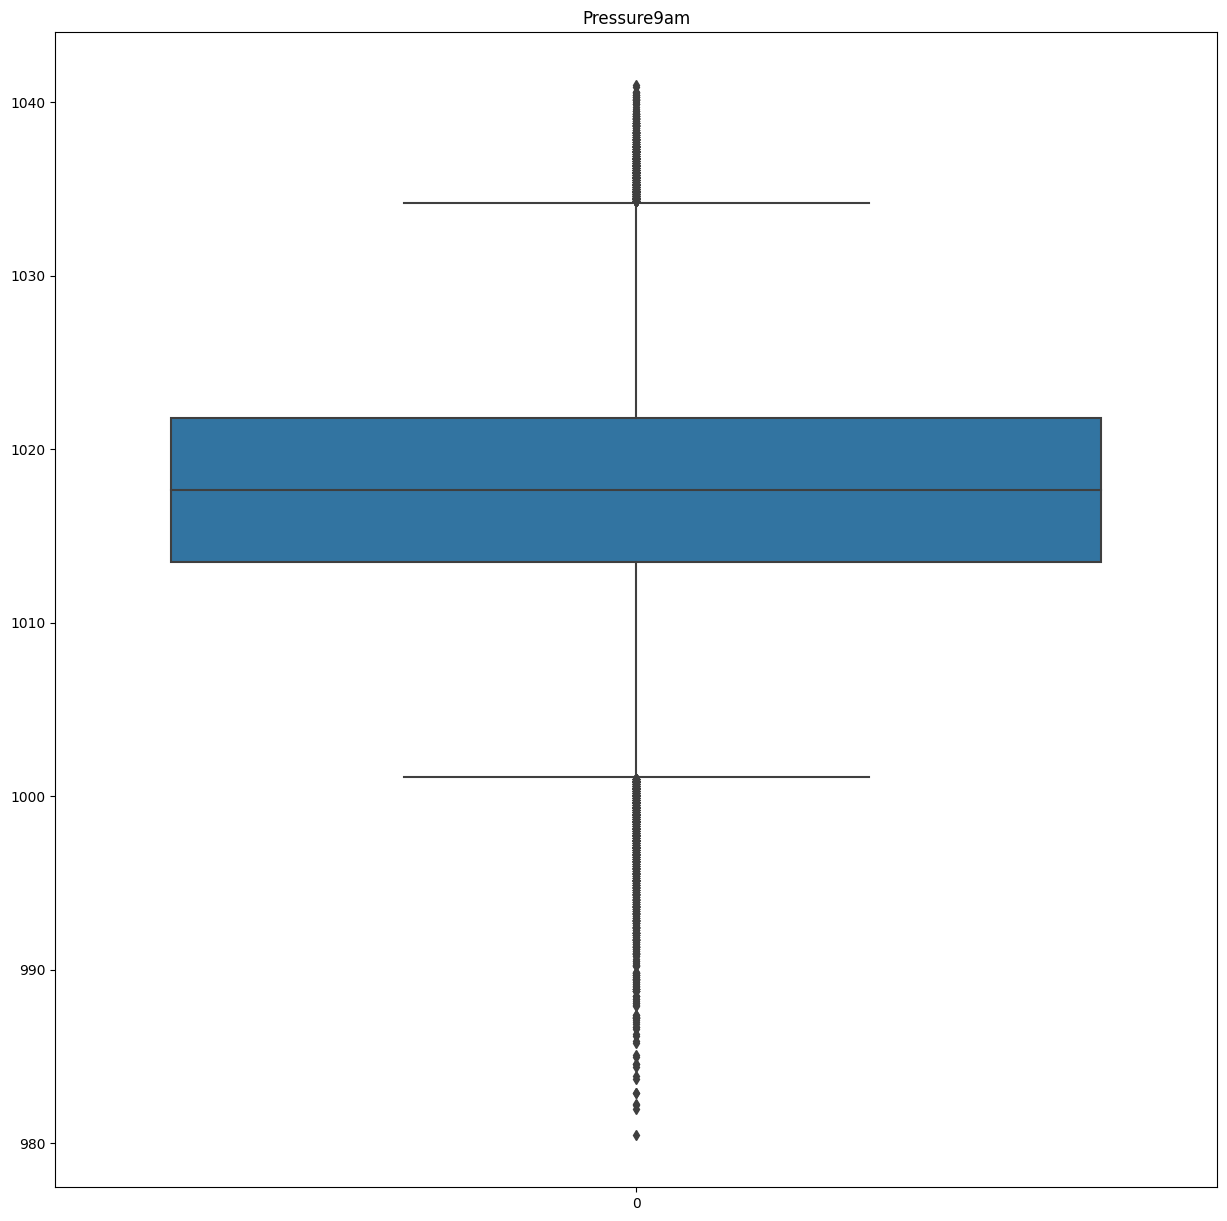

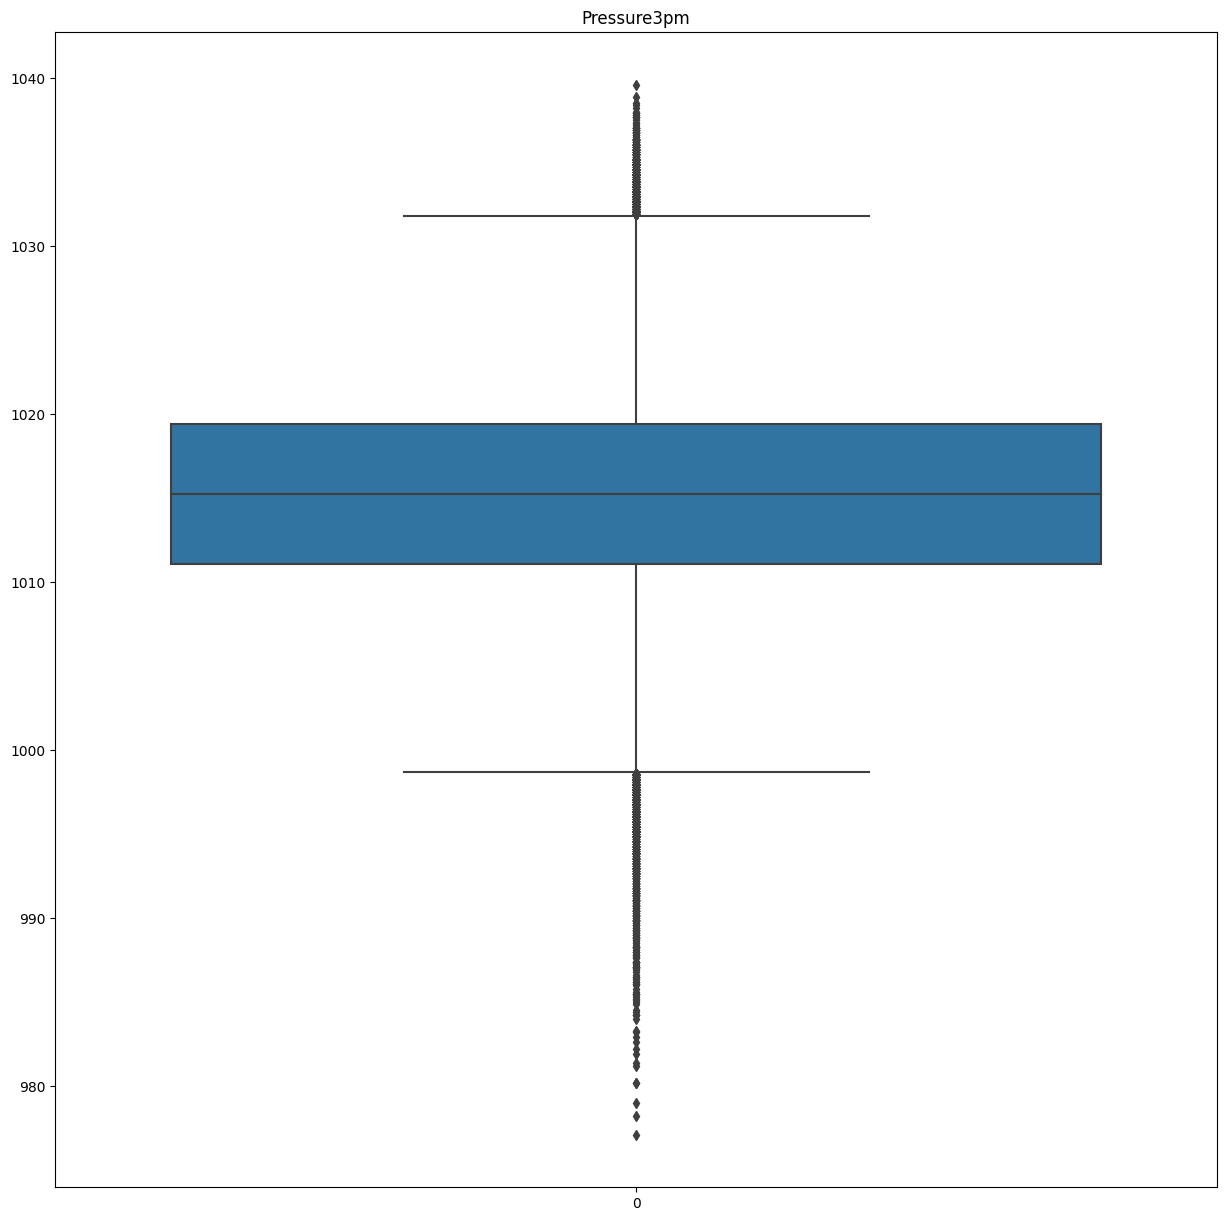

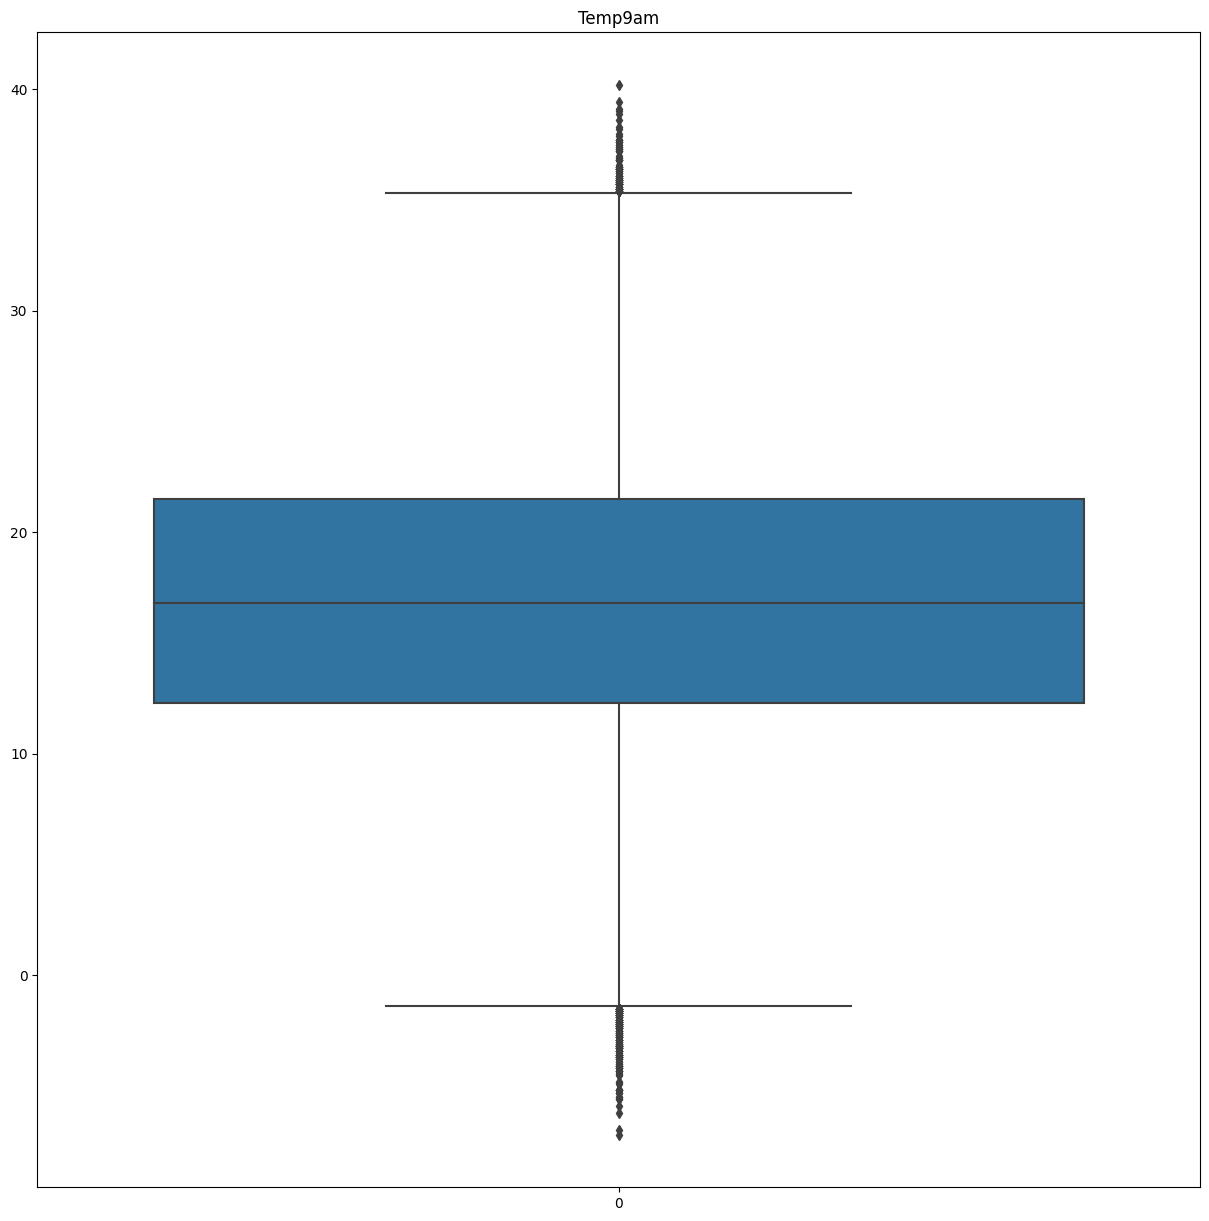

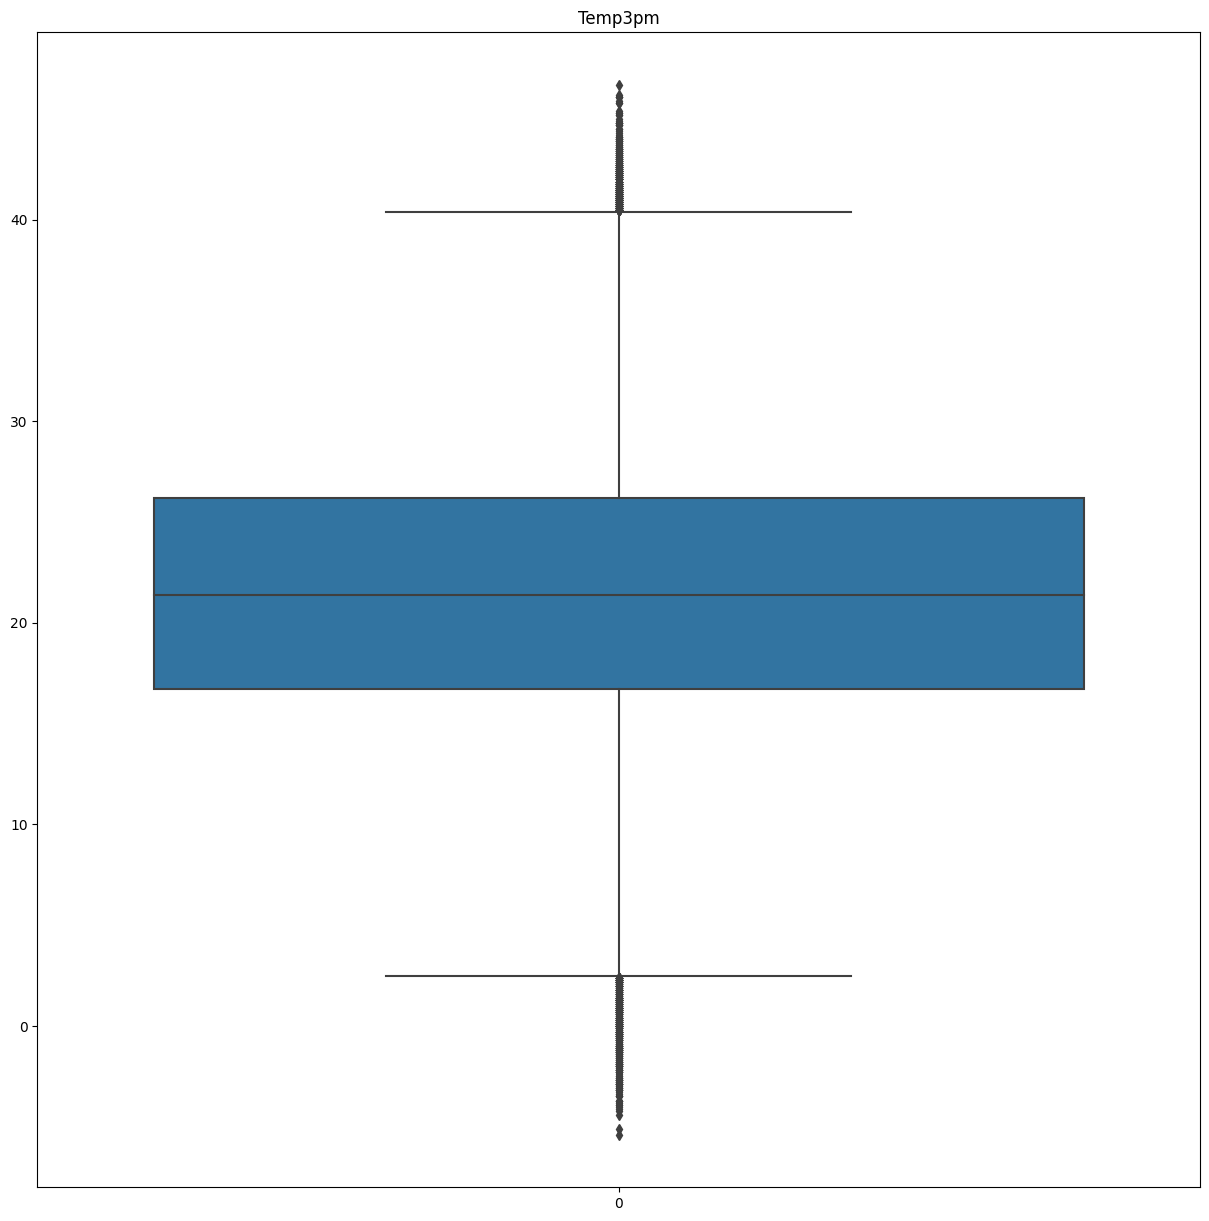

<Figure size 1500x1500 with 0 Axes>

In [22]:
for feature in cont_var:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### One Hot Encoding

In [ ]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

### Lable Encoding

In [ ]:
for feature in categ_var:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

In [ ]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [ ]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [ ]:
df.isnull().sum()*100/len(df)

In [ ]:
df.head()

### We have removed all the null values and handeled with categorical data

### Now we will do the Label Encoding for our Location according to our Target variable

In [ ]:
df_loc = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [ ]:
df_loc.head()

In [ ]:
df_loc[1].sort_values(ascending = False)

In [ ]:
df_loc[1].sort_values(ascending = False).index

In [ ]:
len(df_loc[1].sort_values(ascending = False).index)

In [ ]:
mapped_location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(mapped_location)

### Mapping Data

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [ ]:
df.head()

In [ ]:
sns.countplot(df["RainTomorrow"])

In [ ]:
df= df.drop(['Date'],axis=1)

In [ ]:
df.head()

### Plotting Q-Q Plot

In [ ]:
import scipy.stats as stats
import pylab

In [ ]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [ ]:
for i in cont_var:
    plot_curve(df, i)

### Splitting the data

In [ ]:
x = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
scale.fit(x)

In [ ]:
X= scale.transform(x)

In [ ]:
x.columns

In [ ]:
X=pd.DataFrame(X,columns=x.columns)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

## Model Building using ML Models.
### We will use the following Algorithms:
- RandomForestClassifier
- GaussianNB
- KNeighborsClassifier
- XGB Classifier

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ranfor= RandomForestClassifier()

In [ ]:
ranfor.fit(X_train,y_train)

In [ ]:
ypred= ranfor.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

In [ ]:
metrics.plot_roc_curve(ranfor, X_test, y_test)
metrics.roc_auc_score(y_test, ypred, average=None) 

## Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb= GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

In [ ]:
ypred2= gnb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,ypred2))
print(accuracy_score(y_test,ypred2))
print(classification_report(y_test,ypred2))

In [ ]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, ypred2, average=None) 

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
ypred3= knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,ypred3))
print(accuracy_score(y_test,ypred3))
print(classification_report(y_test,ypred3))

In [ ]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, ypred3, average=None) 

## XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
ypred4= xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,ypred4))
print(accuracy_score(y_test,ypred4))
print(classification_report(y_test,ypred4))

In [ ]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, ypred4, average=None) 

### We will save the best performing model i.e. XGB Classsifier model in our pickle file

In [ ]:
import pickle

In [ ]:
file = open('rain_XGBnew_model.pkl', 'wb')

In [ ]:
pickle.dump(xgb, file)

In [ ]:
model = pickle.load(open("rain_XGBnew_model.pkl", "rb"))

# Using Auto ML

##**PyCaret Library**

### PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

### Installing PyCaret

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
model= setup(data= df, target= 'RainTomorrow')

In [ ]:
compare_models()

In [ ]:
lightgbm= create_model('lightgbm')

In [ ]:
pred_holdout = predict_model(lightgbm,data= X_test)

In [ ]:
pred_holdout